<center><h1 style=\"text-align:center\">Caja Cerrada</h2></center>

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib notebook
import numpy as np
import pandas as pd
from loudspeaker_box import main, closed_box, JCAL, utils
import IPython.display as disp
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
xticks = [31.5, 63, 125, 250, 500, 1000,2000,4000 ,8000]

## Carga de Dataset

In [2]:
dataset = main.dataset()
df = dataset.loc['Eminence','DELTA_12A']

## Simple

In [3]:
delta_simple = main.closed_box_simple(df)
delta_simple.parametros_TS()
delta_simple.dimensiones()
delta_simple.impedancias()
delta_simple.NPS_1m()
Z_e_s = delta_simple.Z_e
wsp = delta_simple.w
NPSs = delta_simple.NPS_n
display(df)

Tamaño [pulgadas]     12.00
Re [ohm]               6.30
fs [Hz]               55.00
Qms                    5.27
Qes                    0.46
Qts                    0.43
Rms [Ns/m]             2.61
Mms [g]               39.00
Cms [mm/N]             0.21
Vas [L]               81.30
Sd [cm^2]            519.50
BL [Tm]               13.50
Pmax [W]             400.00
Xmax [mm]              2.40
Z1k [ohm]               NaN
Z10k [ohm]              NaN
Le [mH]                0.74
Leb [mH]                NaN
Ke [sH]                 NaN
Rss [ohm]               NaN
USPL                  97.70
B^2L^2/Re             28.93
Name: (Eminence, DELTA_12A), dtype: float64

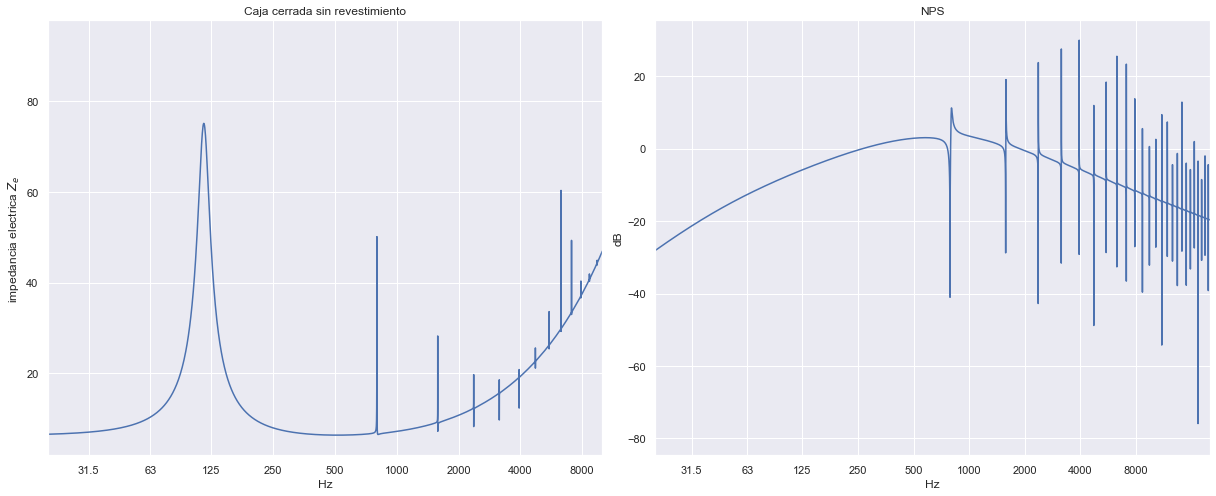

In [4]:
fig21,ax21 = plt.subplots(ncols=2,figsize=(17,7),tight_layout=True)
ax21[0].plot(wsp/(2*np.pi),np.abs(Z_e_s))
ax21[0].set_xscale('log')
ax21[0].set_title('Caja cerrada sin revestimiento')
ax21[0].set_xlabel('Hz')
ax21[0].set_ylabel('impedancia electrica $Z_e$')
ax21[0].set_xlim([20,10025]);
ax21[0].set_xticks(xticks);
ax21[0].set_xticklabels(xticks);

ax21[1].plot(wsp/(2*np.pi),NPSs)
ax21[1].set_xscale('log')
ax21[1].set_title('NPS')
ax21[1].set_xlabel('Hz')
ax21[1].set_ylabel('dB')
ax21[1].set_xlim([20,20025]);
ax21[1].set_xticks(xticks);
ax21[1].set_xticklabels(xticks);

## Revestimiento

Parametros para revestimiento mediante metodo JCAL

| $\phi$ | $\it{K}_{0}[m^{2}]$ | $\theta_{0}[m^{2}]$ | $\alpha_{\infty}$ | $\Lambda_{\upsilon}[m]$ | $\Lambda_{t}[m]$ |
|--------|--------------|--------------|-------------------|----------------------|---------------|
|$0.99$ | $1.84\times 10^{-9}$  | $3.30\times 10^{-9}$ | $1$ | $100 \times 10^{-6}$| $200 \times 10^{-6}$ |


In [5]:
phi=0.99
kappa0 = 1.84e-9 #m^2
theta0 = 3.3e-9 #m^2
alpha = 1
lambda_ups = 100e-6 #m
lambda_t = 200e-6 #m

In [6]:
delta = main.closed_box_poro(df,phi,kappa0,theta0,alpha,lambda_ups,lambda_t)
delta.parametros_TS()
delta.dimensiones()
delta.JCAL()
delta.impedancias()
delta.NPS_1m()
Zed = delta.Z_e
w = delta.w
NPS = delta.NPS_n

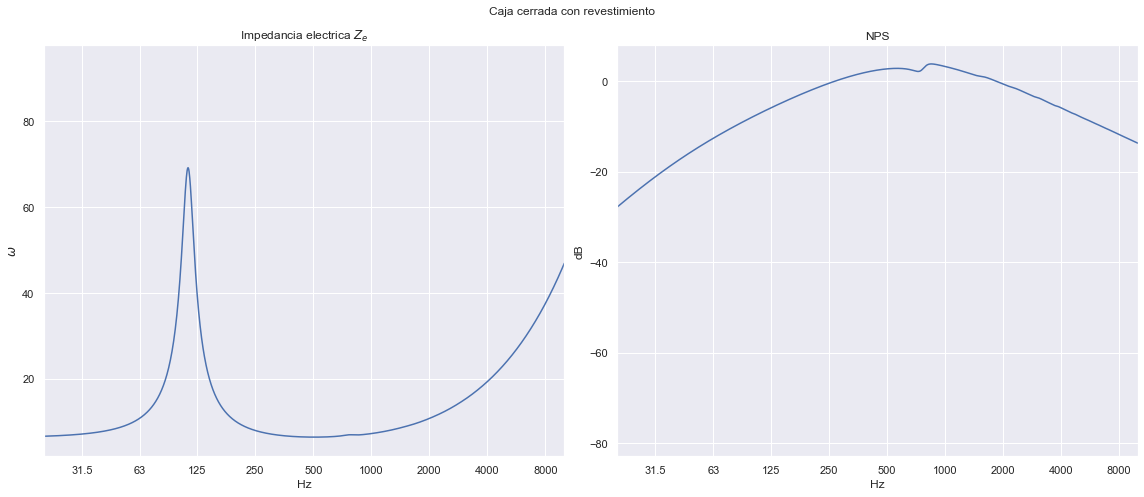

In [7]:
fig22,ax22 = plt.subplots(ncols=2,figsize=(16,7),tight_layout=True)
fig22.suptitle('Caja cerrada con revestimiento')
ax22[0].plot(w/(2*np.pi),np.abs(Zed)[0])
ax22[0].set_xscale('log')
ax22[0].set_title('Impedancia electrica $Z_e$')
ax22[0].set_xlabel('Hz')
ax22[0].set_ylabel('$\omega$')
ax22[0].set_xlim([20,10025]);
ax22[0].set_xticks(xticks);
ax22[0].set_xticklabels(xticks);

ax22[1].plot(w/(2*np.pi),NPS[0])
ax22[1].set_xscale('log')
ax22[1].set_title('NPS')
ax22[1].set_xlabel('Hz')
ax22[1].set_ylabel('dB')
ax22[1].set_xlim([20,10025]);
ax22[1].set_xticks(xticks);
ax22[1].set_xticklabels(xticks);

In [8]:
lx = delta.lx
ly = delta.ly
lz = delta.lz
d = delta.d
l = lz+d
x = np.linspace(0,lx,1000)
y = np.linspace(0,ly,1000)
z = np.linspace(0,l,1000)
eje = np.zeros(1000)

#material poroso
p = np.linspace(lz,l,1000)

In [9]:
r = delta.a
h = k = lx/2
xp = np.linspace(h-r,h+r,1000)
yp1 = np.sqrt(r**2-(xp-h)**2)+k
yp2 = -np.sqrt(r**2-(xp-h)**2)+k

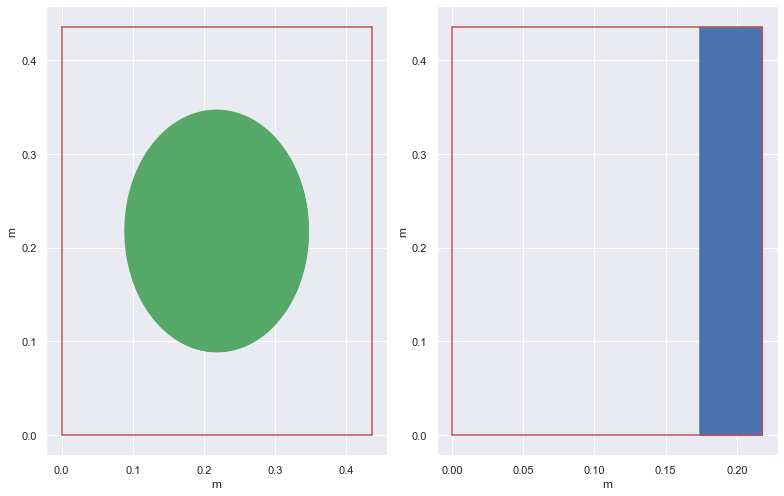

In [10]:
fig22,ax22 = plt.subplots(nrows=1, ncols=2,figsize=(11,7),tight_layout=True)

#vista frontal
ax22[0].plot(eje,x,'r')
ax22[0].plot(y,eje,'r')
ax22[0].plot(eje+ly,x,'r')
ax22[0].plot(y,eje+lx,'r')
ax22[0].set_ylabel('m')
ax22[0].set_xlabel('m')
#vista lateral
ax22[1].plot(eje,x,'r')
ax22[1].plot(z,eje,'r')
ax22[1].plot(eje+l,x,'r')
ax22[1].plot(z,eje+lx,'r')
ax22[1].set_ylabel('m')
ax22[1].set_xlabel('m')
#altavoz
ax22[0].plot(xp,yp1,'g')
ax22[0].fill_between(xp,yp1,yp2,color='g');
ax22[0].plot(xp,yp2,'g');
#material poroso
ax22[1].plot(eje+lz,x)
ax22[1].fill_between(p,eje+lx,color='b');

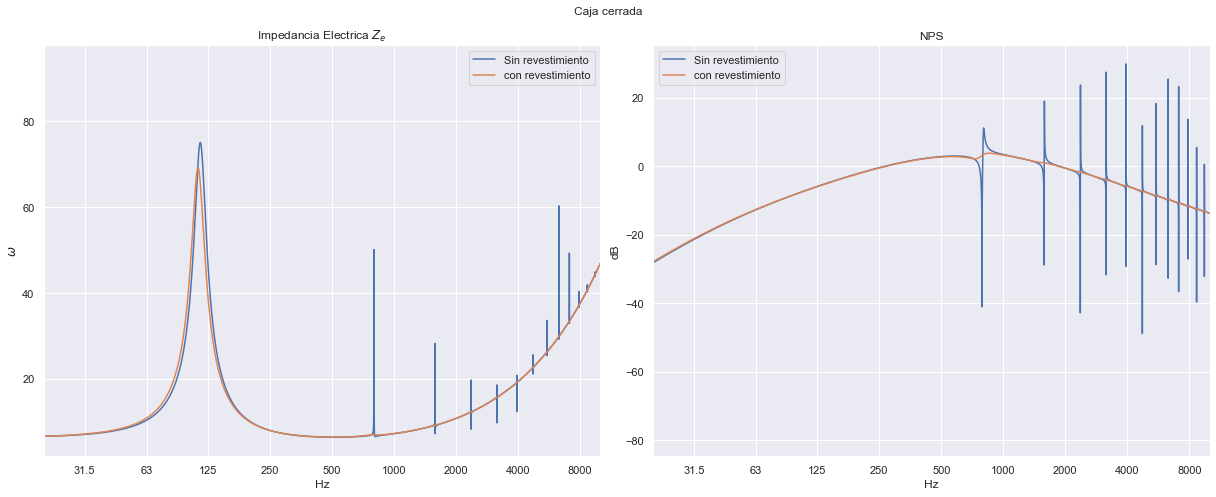

In [11]:
fig24,ax24 = plt.subplots(ncols=2,figsize=(17,7),tight_layout=True)
fig24.suptitle('Caja cerrada')
ax24[0].plot(wsp/(2*np.pi),np.abs(Z_e_s),label='Sin revestimiento')
ax24[0].plot(w/(2*np.pi),np.abs(Zed)[0],label='con revestimiento')
ax24[0].set_xscale('log')
ax24[0].set_title('Impedancia Electrica $Z_e$')
ax24[0].set_xlabel('Hz')
ax24[0].set_ylabel('$\omega$')
ax24[0].set_xlim([20,10025]);
ax24[0].set_xticks(xticks);
ax24[0].set_xticklabels(xticks);
ax24[0].legend()



ax24[1].plot(wsp/(2*np.pi),NPSs,label='Sin revestimiento')
ax24[1].plot(w/(2*np.pi),NPS[0],label='con revestimiento')
ax24[1].set_xscale('log')
ax24[1].set_title('NPS')
ax24[1].set_xlabel('Hz')
ax24[1].set_ylabel('dB')
ax24[1].set_xlim([20,10025]);
ax24[1].set_xticks(xticks);
ax24[1].set_xticklabels(xticks);
ax24[1].legend()